---

## Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service), for instance you could store your work on GitLab. You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Make sure your code is readable, organised, and commented appropriately.


## Team working 

Firstly agree amongst yourself how you are to work together as a group. 
- When will you meet? or will you work remotely from each other?
- How are you going to share code?
- How will you divide tasks?
- Who will present the final notebook, who will upload?
- When are you planning to work on the project?

The following tasks are all open-ended, so you should plan to work on them and investigate the problems raised and think about what you wish to cover. Because the task is open-ended you don't need to talk about every aspect of the problem to get a good mark - you should aim to present a coherent and well coded investigation into some aspects of each task though. The listed questions are a guide to some things you could think about to get you started, you don't need to answer them all, and you can certainly answer questions that are not listed.

When you are presenting your investigation of each problem, be sure to make a coherent discussion for each task (using markdown, maths as appropriate and code cells). In particular, since you are working as a group some work will be needed to make a single written response to the task combining all of the code and writing that you each contribute - this is something that you should plan to do and the quality of presentation will be marked.

## Task 1 - Analysing the product reviews

In this project, you are supposed to analyse product reviews and extract helpful information from them. The case we are studying here is the review dataset of women’s clothes that are sold by a company online. In the file `WomensApparelReviews.csv`, you are given over 23000 reviews that are real but anonymized. The columns of this dataset are the following variables:


**Product ID**: integer variable that refers to the specific item that is reviewed.

**Age**: the reviewers age.

**Title**: the title picked by the reviewer (some reviewers didn't pick any titles).

**Review Text**: the body text of the review.

**Rating**: the product score given by the customer from 1 (worst), to 5 (best).

**Is it Recommended?**: the customers are asked whether or not they recommend the product. 1 means the product is recommended, 0 means not recommended.

**Department**: the products are classified in different departments such as dress, top and ...

A major part of this task is analysing the review text and deciding how positive or negative it is. To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words, respectively. These words come from the paper by *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. You will need to invent a metric for how positive or negative "Review Text" is, based on how many of the words in it are in the positive/negative word lists. For instance, is a review containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the review. You can also decide if a "Title" is positive, negative or neutral by searching for them in the lists of positive and negative words. Once you have developed one positivity/negativity measure can you think of other measures that you could compare?

This project is open-ended, so you can come up with your own ideas to analyse the dataset and extract useful information or interesting facts. However at least one of the ideas you present should make use of the positive and negative word lists for analysing the reviews text. Here are some questions you might address in your analysis (of course you are not limited to just these questions):

- What is the age distribution of customers?
- What is the most popular item in each age group? (you can classify the ages however you think appropriate - be sure to justify what you do).
- Using the measure of negativity or positivity that you define, rate the reviews. You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and that of the review texts correlated? 
- What is the average rating in positive, negative or neutral reviews?
- Is the rating correlated to your measure of negativity-positivity? 
- Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
- Which product attracted the most positive reviews? This would help the company to focus more on the product that people liked or make changes to the product that people did not like. Is there any such advice you could give them on the products that could come from the reviews?
- What is the most recommended product? What is the least recommended product?
- Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers? 
- Which age group uses more positive words? Which age group uses more negative words?
- Are older people more inclined to recommend a product or younger people?
- Is it true that unhappy customers use more capital letters? or it is the other way around?
- Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


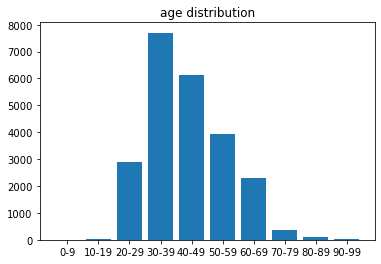

0-9: None
10-19: 868
20-29: 1078
30-39: 1078
40-49: 1078
50-59: 1078
60-69: 862
70-79: 1078
80-89: 872
90-99: 1094


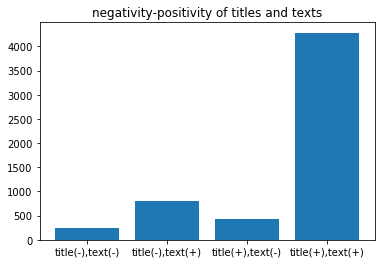

If the text is positive, it is very possible for the title to have a same positivity,vice versa
positive: average rating is 4.30498917872195
negatives: average rating is 3.625896246309574
Yes, average rating for positivity is far greater than that for negativity
outliers count is 1367, 5.82% in all datas
product 1078 attracted the most positive reviews
company should provide more product 1078
the most recommended product: 1078
the least recommended product: 523
unhappy customers write longer reviews
age group 30-39 uses more positive words
age group 30-39 uses more negative words


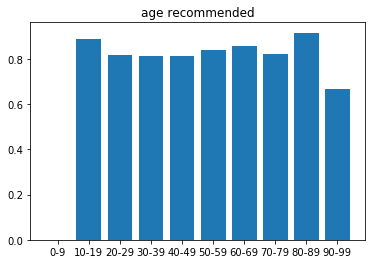

No, every age group' people like to recommend a product
unhappy customers: 0.40% letters is capital
satisfied customers: 0.42% letters is capital


In [2]:
import csv

def get_words(filename):
    words = set()
    with open(filename, 'r') as input_file:
        for line in input_file:
            line = line.strip()
            if not line or line.startswith(';'):
                continue
            words.add(line.lower())
    return words

def get_raw_data(path):
    reviewers = []
    with open(path, 'r', encoding = "ISO-8859-1") as input_file:
        f = csv.reader(input_file)
        next(f)
        for row in f:
            reviewer = {
                'product_id': int(row[1]),
                'age': int(row[2]),
                'title': row[3],
                'text': row[4],
                'rating': int(row[5]),
                'recommended': int(row[6]),
                'department': row[7],
            }
            reviewers.append(reviewer)
    return reviewers

positives = get_words('positive-words.txt')
negatives = get_words('negative-words.txt')
reviewers = get_raw_data('WomensApparelReviews.csv')


# What is the age distribution of customers?
x = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
age_distribution = [0 for _ in range(10)]
for reviewer in reviewers:
    age = reviewer['age']
    age_distribution[age // 10] += 1
import matplotlib.pyplot as plt
plt.title('age distribution')
plt.bar(x, age_distribution)
plt.show()

# What is the most popular item in each age group?
age_distribution = [{} for _ in range(10)]
for reviewer in reviewers:
    age = reviewer['age']
    pid = reviewer['product_id']
    if pid not in age_distribution[age // 10]:
        age_distribution[age // 10][pid] = 0
    age_distribution[age // 10][pid] += 1

for year, stat in zip(x, age_distribution):
    most = None
    if len(stat) > 0:
        max_value = max(stat.values())
        for key in stat:
            if stat[key] == max_value:
                most = key
                break
    print('{}: {}'.format(year, most))

# Using the measure of negativity or positivity that you define, rate the reviews.
# You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and
# that of the review texts correlated?
import re
def measure_setence(setence, positives, negatives):
    emotion_words = []
    for i, word in enumerate(setence.split()):
        if word in positives:
            emotion_words.append((i, word, True))
        elif word in negatives:
            emotion_words.append((i, word, False))
    emotion_words_copy = emotion_words[:]
    for t in emotion_words:
        if not t[2]:
            for i in range(len(emotion_words_copy)):
                tc = emotion_words_copy[i]
                if tc[2] and tc[0] > t[0] and abs(tc[0]- t[0]) <= 5:
                    emotion_words_copy[i] = (tc[0], tc[1], False)
    score = 0
    for t in emotion_words_copy:
        if t[2]:
            score += 1
        else: 
            score -= 1
    return score

def measure(text, positives, negatives):
    score = 0
    setences = re.split(r',|\.|\?|!', text.strip())
    for setence in setences:
        ms = measure_setence(text, positives, negatives)
        score += ms
    return score

x = ['title(-),text(-)','title(-),text(+)','title(+),text(-)','title(+),text(+)']
y = [0, 0, 0, 0]
for reviewer in reviewers:
    reviewer['title-pn'] = measure(reviewer['title'], positives, negatives)
    reviewer['text-pn'] = measure(reviewer['text'], positives, negatives)
    if reviewer['title-pn'] < 0 and reviewer['text-pn'] < 0:
        y[0] += 1
    elif reviewer['title-pn'] < 0 and reviewer['text-pn'] > 0:
        y[1] += 1
    elif reviewer['title-pn'] > 0 and reviewer['text-pn'] < 0:
        y[2] += 1
    elif reviewer['title-pn'] > 0 and reviewer['text-pn'] > 0:
        y[3] += 1
plt.title('negativity-positivity of titles and texts')
plt.bar(x, y)
plt.show()
print('If the text is positive, it is very possible for the title to have a same positivity,vice versa')

# What is the average rating in positive, negative or neutral reviews?
prates_count = 0
prates_sum = 0
nrates_count = 0
nrates_sum = 0
for reviewer in reviewers:
    if reviewer['text-pn'] < 0:
        nrates_count += 1
        nrates_sum += reviewer['rating']
    elif reviewer['text-pn'] > 0:
        prates_count += 1
        prates_sum += reviewer['rating']

print('positive: average rating is {}'.format(prates_sum / prates_count))
print('negatives: average rating is {}'.format(nrates_sum / nrates_count))

# Is the rating correlated to your measure of negativity-positivity?
print('Yes, average rating for positivity is far greater than that for negativity')

# Are there many outliers who wrote a negative text but left a high rating
c = 0
for reviewer in reviewers:
    if reviewer['text-pn'] < 0 and reviewer['rating'] >= 4:
        c += 1
print('outliers count is {}, {:.2f}% in all datas'.format(c, c * 100 / len(reviewers)))

# Which product attracted the most positive reviews
pcount = {}
for reviewer in reviewers:
    if reviewer['text-pn'] > 0:
        pid = reviewer['product_id']
        if pid not in pcount:
            pcount[pid] = 0
        pcount[pid] += 1
most = -1
max_value = max(pcount.values())
for key in pcount:
    if pcount[key] == max_value:
        most = key
        break
print('product {} attracted the most positive reviews'.format(most))
# Is there any such advice you could give them on the products that could come from the reviews
print('company should provide more product {}'.format(most))

# What is the most recommended product
recommended_count = {}
for reviewer in reviewers:
    pid = reviewer['product_id']
    if pid not in recommended_count:
        recommended_count[pid] = 0
    if reviewer['recommended'] == 1:
        recommended_count[pid] += 1
most, least = -1, -1
max_value = max(recommended_count.values())
min_value = min(recommended_count.values())
for key in recommended_count:
    if recommended_count[key] == max_value:
        most = key
        break
# What is the least recommended product
for key in recommended_count:
    if recommended_count[key] == min_value:
        least = key
        break
print('the most recommended product: {}'.format(most))
print('the least recommended product: {}'.format(least))

# Which group of reviewers wrote a longer text in their review?
# Do unhappy customers write longer reviews or satisfied customers?
unhappy_text_len = 0
unhappy_text_count = 0
satisfied_text_len = 0
satisfied_text_count = 0
for reviewer in reviewers:
    if reviewer['text-pn'] > 0:
        satisfied_text_len += len(reviewer['text'])
        satisfied_text_count += 1
    elif reviewer['text-pn'] < 0:
        unhappy_text_len += len(reviewer['text'])
        unhappy_text_count += 1
satisfied_text_len /= satisfied_text_count
unhappy_text_len /= unhappy_text_count
if satisfied_text_len > unhappy_text_len:
    print('satisfied customers write longer reviews')
else:
    print('unhappy customers write longer reviews')
# Which age group uses more positive words?
# Which age group uses more negative words?
x = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
positive_wordcount = [0 for _ in range(10)]
negative_wordcount = [0 for _ in range(10)]
for reviewer in reviewers:
    idx = reviewer['age'] // 10
    for word in reviewer['text'].split():
        word = word.lower()
        if word in positives:
            positive_wordcount[idx] += 1
        elif word in negatives:
            negative_wordcount[idx] += 1
pmax = max(positive_wordcount)
for i, j in zip(x, positive_wordcount):
    if pmax == j:
        print('age group {} uses more positive words'.format(i))
        break
nmax = max(negative_wordcount)
for i, j in zip(x, negative_wordcount):
    if nmax == j:
        print('age group {} uses more negative words'.format(i))
        break
# Are older people more inclined to recommend a product or younger people?
x = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
age_recommended = [0 for _ in range(10)]
age_distribution = [0 for _ in range(10)]
for reviewer in reviewers:
    idx = reviewer['age'] // 10
    if reviewer['recommended'] > 0:
        age_recommended[idx] += 1
    age_distribution[idx] += 1
for i in range(10):
    if age_distribution[i] != 0:
        age_recommended[i] /= age_distribution[i]

plt.title('age recommended')
plt.bar(x, age_recommended)
plt.show()
print('No, every age group\' people like to recommend a product')
# Is it true that unhappy customers use more capital letters? or it is the other way around?
unhappy_capital_letters = 0
unhappy_letters = 0
satisfied_capital_letters = 0
satisfied_letters = 0
for reviewer in reviewers:
    idx = reviewer['age'] // 10
    for word in reviewer['text'].split():
        for ch in word:
            if ch.isalpha():
                if reviewer['text-pn'] > 0:
                    satisfied_letters += 1
                    if ch.isupper():
                        satisfied_capital_letters += 1
                elif reviewer['text-pn'] < 0:
                    unhappy_letters += 1
                    if ch.isupper():
                        unhappy_capital_letters += 1

print('unhappy customers: {:.2f}% letters is capital'.format(unhappy_capital_letters * 100 / unhappy_letters))
print('satisfied customers: {:.2f}% letters is capital'.format(satisfied_capital_letters * 100 / satisfied_letters))
# Can you come up with a way to consider the positive words in a negative statement negative?
# 1. split text to some sentences
# 2. for each sentence
#    if positive word and negative word's distance <= 5 words, we think the positive word is negative
# 3. measure sentence based on the word count 
# See code in function measure_setence and function measure

## Task 2 - Analysing transportation data

In this task, you should analysing the cycling trips in Edinburgh in September 2019 collected in `cyclingtrips_Sep2019.csv`. This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You can extend your analysis to other months by downloading data from [this link](https://edinburghcyclehire.com/open-data/historical). 

As a part of this task you should visualise some aspects of the data geographically on a map. There are several different libraries and packages that you can use for this purpose. Below, I walk you through the installation and the basic usage of **folium**, but you are welcome to use any other geographical visualisation tools like `googlemaps` and `gmplot`. You can also find more about the folium library [here](https://python-visualization.github.io/folium/) and implement more advanced features of it in your project.

First, you need to install the library before importing it. The following cell does it for you in `Noteable` or a regular `Jupyter Notebook`:
 

In [63]:
import sys
!{sys.executable} -m pip install folium

Once you installed folium, you should import it and give it a starting coordinate

In [64]:
import folium

m = folium.Map(
    location=[55.924550, -3.176920],
    zoom_start=15
)


In the cell above, I gave the latitude and longitude of Murchison House as the starting location to folium. I also set the initial zoom to 15. You can change this coordinate as well as the zooming and observe the results. To display the map in a Jupyter notebook, you just need to ask for the object representation (simply typing `"m"` for the above map):

I can mark the Murchison House on the map by a circle with `radius=50`

In [65]:
folium.CircleMarker(
    location=[55.924550, -3.176920],
    radius=50,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)



Using this tool, we want to visualise how busy the stations are as destinations or starting points of cycling trips. After dividing the cycling trips into morning and afternoon/evening trips, show how many of them end in or start from a particular station. You can do this by drawing a radius proportional to the number of trips. You can also separate the stations as destinations or starting points by drawing them on different maps or by colour-coding them.

Just like the first task, this is an open-ended problem. You can address the following or any other interesting questions about bike trips:

- What was the average journey time and distance of bike trips on weekdays? What about weekends?
- What was the most common time(s) of day for journeys to be undertaken?
- Which areas do you suggest for building the new stations based on your analysis?
- Can you visualise which stations were used mostly for shorter trips and which one for longer trips?
- Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

There is more open data available for other cities - here is the link for the data on the similar bike hire scheme in London ([TFL open data](https://cycling.data.tfl.gov.uk)), and for New York [here](https://www.citibikenyc.com/system-data). You could also think about some of the issues involved in other cities and bike share schemes, and perform similar sorts of analyses or comparisons. For example:

- Do bike hire schemes share popular times of day?
- Can you trace the common commute patterns of different cities? Are there any commonalities of shape or structure to the patterns?
- How does the average rental time compare across different cities? How does that time change as the size of the city changes?

In [66]:
import csv
import pandas as pd
import numpy as np

ct = pd.read_csv('cyclingtrips_Sep2019.csv')
ct.shape #(13928, 13)

# Split "started_at" into columns date, day, time, integer part of time.
new = ct["started_at"].str.split(" ", n = 1, expand = True) 
ct["Date"]= new[0]; ct["Time"]= new[1] 

new1 = ct["Time"].str.split(":", n = 1, expand = True)
ct["Integer_time"]= pd.to_numeric(new1[0])

day = ct["Date"].str.split("-", n = 2, expand = True) 
ct["Day"]= pd.to_numeric(day[2])

#Create a function that returns desired strings
def func(x):
    if x < 12:
        return "Morning_trips"
    elif x <= 24 :
        return "Afternoon_or_Evening_trips"

ct['Trips'] = ct['Integer_time'].apply(func)

# Classify Trips into Morning trips and Afternoon/Evening trips
classtrips = ct["Trips"].unique()

# Generate two dataframes
for temp_classtrips in classtrips:
    temp_data = ct[ct["Trips"].isin([temp_classtrips])]
    exec("ct%s = temp_data"%temp_classtrips)

# Extract columns we need to draw maps and focus on questions we are interested in.
Mo = ctMorning_trips.loc[:,['start_station_id','start_station_latitude','start_station_longitude']]
sort_Mo = Mo.sort_values(by = 'start_station_id')
gb_Mo = sort_Mo.drop_duplicates()

AforEve = ctAfternoon_or_Evening_trips.loc[:,['start_station_id','start_station_latitude','start_station_longitude']]
sort_AforEve = AforEve.sort_values(by = 'start_station_id')
gb_AforEve = sort_AforEve.drop_duplicates()


In [67]:
pd.options.mode.chained_assignment = None
# Group the two datasets based on the start station id and count how many trips start from each station
# in the morning and afternoon/evening trips respectively.
Mgb = ctMorning_trips.groupby(by = 'start_station_id')['Trips'].count()
Mgb = Mgb.tolist()
AEgb = ctAfternoon_or_Evening_trips.groupby(by = 'start_station_id')['Trips'].count()
AEgb = AEgb.tolist()

# Store the ratios into their own list.
Msum = sum(Mgb); AEsum = sum(AEgb)
Mproportion  = []; AEproportion  = []
for i,j in enumerate(range(84)):
    Mproportion.append(int(Mgb[i])*1000/Msum);#multiply by 1000 is to make the radius more visible
    AEproportion.append(int(AEgb[j])*1000/AEsum)

# Add the ratios as new columns to their dataframes separately.
gb_Mo['Morning trips count'] = pd.Series(Mgb).values
gb_Mo["% of Morning"] = pd.Series(Mproportion).values
gb_AforEve['Afternoon/Evening trips count'] = pd.Series(AEgb).values
gb_AforEve["% of Afternoon/Evening"] = pd.Series(AEproportion).values

# the type of Mproportion or AEproportion is list, so can be directly used later.

We focus on the start staions only. After dividing the cycling trips into morning and afternoon/evening trips, we have two dataframes now and calculate the ratios as the radius later. Then we draw two maps below: Morning trips map and Afternoon/Evening trips map. The bigger the circle, the more tirps at this station.

In [68]:
# Morning trips map

# define a orginal map
m = folium.Map(
    location=[55.95003729, -3.187821519],
    zoom_start=13,
)

#add start stations positioins to the original map
for i,j,k in zip(gb_Mo['start_station_latitude'].tolist(),gb_Mo['start_station_longitude'].tolist(), Mproportion):
   
    folium.CircleMarker(
        location=[i, j],
        radius=k,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)
m

In [69]:
# Afternoon/Evening trips map

# define a orginal map
m = folium.Map(
    location=[55.95003729, -3.187821519],
    zoom_start=13,
)

#add end stations positioins to the original map
for i,j,k in zip(gb_AforEve['start_station_latitude'].tolist(),gb_AforEve['start_station_longitude'].tolist(), AEproportion):
    folium.CircleMarker(
        location=[i, j],
        radius=k,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)
m

**Q**: What was the average journey time and distance of bike trips on weekdays? What about weekends?

In [70]:
#create a indicator of weekends or weekdays to distinguish them in the next dividing step
ct['weeks'] = 0
for i in range(13928):
    if ct['Day'][i] % 7 in (0,1):
        ct['weeks'][i] = 'weekends'
    else:
        ct['weeks'][i] = 'weekdays'

#divide the 'ct'dataframe into two dataframes based on weekdays or weekends       
weekends =  ct[ct['weeks'].isin(['weekends'])]
weekdays =  ct[ct['weeks'].isin(['weekdays'])]

In [71]:
import math as mt

def distance(lat1,lon1,lat2,lon2):
    '''
    a function to calculate distance(miles) based on two points' latitude and longitude,(lat1,lon1) is the position of
    one trip's start stations,(lat2,lon2) is the position of this trip's end station
    '''
    lat1,lon1,lat2,lon2 = map(mt.radians, [lat1,lon1,lat2,lon2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=mt.sin(dlat/2)**2 + mt.cos(lat1) * mt.cos(lat2) * mt.sin(dlon/2)**2 
    distance=2*mt.asin(mt.sqrt(a))*6371*1000/1609.34
    return distance

#calculate distances of weekdays trips
trip_dis_wday = []
for i,j,k,l in zip(weekdays['start_station_latitude'],weekdays['start_station_longitude'],weekdays['end_station_latitude'],weekdays['end_station_longitude']):
    trip_dis_wday.append(distance(i,j,k,l))
    
#calculate distances of weekends trips    
trip_dis_wend = []
for i,j,k,l in zip(weekends['start_station_latitude'],weekends['start_station_longitude'],weekends['end_station_latitude'],weekends['end_station_longitude']):
    trip_dis_wend.append(distance(i,j,k,l))
    
#calculate average journey time
jou_t_wends = weekends['duration'].mean()
jou_t_wdays = weekdays['duration'].mean()

#calculate average journey distance
jou_dis_wends = np.mean(trip_dis_wend)
jou_dis_wdays = np.mean(trip_dis_wday)

print("weekends average journey time is",jou_t_wends)
print("weekdays average journey time is",jou_t_wdays)
print("weekends average journey distance is",jou_dis_wends, 'miles.')
print("weekdays average journey distance is",jou_dis_wdays, 'miles.')

weekends average journey time is 1909.0922309027778
weekdays average journey time is 1287.7728540772532
weekends average journey distance is 1.1758033956139218 miles.
weekdays average journey distance is 1.1361466971139347 miles.


**Q**: What was the most common time(s) of day for journeys to be undertaken?

In [72]:
common_time = ct['Integer_time'].value_counts()
value_hour = common_time.keys().tolist()
keys_trips = common_time.tolist()

print('We group by hours and count the trips for each hour. Therefore the most common time of day for journeys is at ', 
      value_hour[0],':00-',value_hour[0],':59 with ',keys_trips[0], ' trips being undertaken.',sep='')

We group by hours and count the trips for each hour. Therefore the most common time of day for journeys is at 16:00-16:59 with 1539 trips being undertaken.


**Q**: Which areas do you suggest for building the new stations based on your analysis?

**A**: According the two maps above, we suggest to build some new stations at/around Northfield to share the burden of trips between Portobello and city center.

**Q**: Can you visualise which stations were used mostly for shorter trips and which one for longer trips?

In [97]:
#calculate distances based on the original dataset
trip_dis_all = []
for i,j,k,l in zip(ct['start_station_latitude'],ct['start_station_longitude'],ct['end_station_latitude'],ct['end_station_longitude']):
    trip_dis_all.append(distance(i,j,k,l))

ct['distance'] = trip_dis_all
ct = ct.sort_values(by = 'distance')

# We use the top and the last 10% of the distance to define shorter and longer trips.
# shorter trips
x = int(round(len(ct.index)*0.1 , 0))
shorter = ct.nsmallest(x, ['distance'])
start_shorter = shorter['start_station_name'].value_counts()
end_shorter = shorter['end_station_name'].value_counts()
print('The start station was used mostly for shorter trip is', start_shorter.index.tolist()[0],
      'with',start_shorter.tolist()[0],'trips')
print('The end station was used mostly for shorter trip is', end_shorter.index.tolist()[0],
      'with',end_shorter.tolist()[0],'trips\n')

# longer trips
longer = ct.nlargest(x, ['distance'])
start_longer = longer['start_station_name'].value_counts()
end_longer = longer['end_station_name'].value_counts()
print('The start station was used mostly for longer trip is', start_longer.index.tolist()[0],
      'with',start_longer.tolist()[0],'trips')
print('The end station was used mostly for longer trip is', end_longer.index.tolist()[0],
      'with',end_longer.tolist()[0],'trips')


The start station was used mostly for shorter trip is Portobello with 173 trips
The end station was used mostly for shorter trip is Portobello with 173 trips

The start station was used mostly for longer trip is Portobello with 254 trips
The end station was used mostly for longer trip is Portobello with 408 trips


**Q**: Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

In [113]:
July = pd.read_csv('07.csv')
July.shape #(12290, 13)

sort_july = July.sort_values(by = 'start_station_id')
drop_july = sort_july.drop_duplicates(subset = 'start_station_id')

gb_july = sort_july.groupby(by = 'start_station_id')['start_station_id'].count()
gb_july_keys = gb_july.tolist()

prop_july  = []
for i,j in enumerate(range(67)):
    prop_july.append(int(gb_july_keys[i])*1000/12290) #multiply by 1000 is to make the radius more visible
    

# define a orginal map
m = folium.Map(
    location=[55.95003729, -3.187821519],
    zoom_start=14,
)

# add start stations positioins to the original map
for i,j,k in zip(drop_july['start_station_latitude'].tolist(),drop_july['start_station_longitude'].tolist(), prop_july):  
    folium.CircleMarker(
        location=[i, j],
        radius=k,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)


In [114]:
August = pd.read_csv('08.csv')
August.shape #(17140, 13)

sort_august = August.sort_values(by = 'start_station_id')
drop_august = sort_august.drop_duplicates(subset = 'start_station_id')

gb_august = sort_august.groupby(by = 'start_station_id')['start_station_id'].count()
gb_august_keys = gb_august.tolist()

prop_august  = []
for i,j in enumerate(range(72)):
    prop_august.append(int(gb_august_keys[i])*1000/12290) #multiply by 1000 is to make the radius more visible
    


# add start stations positioins to the original map
for i,j,k in zip(drop_august['start_station_latitude'].tolist(),drop_august['start_station_longitude'].tolist(), prop_july):  
    folium.CircleMarker(
        location=[i, j],
        radius=k,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

In [115]:
sort_september = ct.sort_values(by = 'start_station_id')
drop_september = ct.drop_duplicates(subset = 'start_station_id')

gb_september = sort_september.groupby(by = 'start_station_id')['start_station_id'].count()
gb_september_keys = gb_august.tolist()

prop_september  = []
for i,j in enumerate(range(72)):
    prop_september.append(int(gb_september_keys[i])*1000/12290) #multiply by 1000 is to make the radius more visible
    

# add start stations positioins to the original map
for i,j,k in zip(drop_september['start_station_latitude'].tolist(),drop_september['start_station_longitude'].tolist(), prop_july):  
    folium.CircleMarker(
        location=[i, j],
        radius=k,
        color='orange',
        fill=True,
        fill_color='orange'
    ).add_to(m)
m

In [77]:
print('Blue: 12290 trips in July','Red: 17140 trips in August','Green: 13928 trips in September',sep="\n")

x = drop_august.loc[drop_august['start_station_id'] == gb_august.index.tolist()[0], 'start_station_name'].tolist()[0]
print('The busiest month is September but the busiest start station is',x,
      'with',gb_august.tolist()[0],'trips at August.')


Blue: 12290 trips in July
Red: 17140 trips in August
Green: 13928 trips in September
The busiest month is September but the busiest start station is Waverley Bridge with 420 trips at August.


**Q**: Compare Edinburgh with New York: total number of trips and average travel miles in weekdays and weekends

In [98]:
newyork_orig = pd.read_csv('newyork_jul-sep2018.csv')
newyork_orig.shape #(92, 6)
newyork = newyork_orig[62:92]

split = newyork["Date"].str.split("/", n = 2, expand = True)
newyork["Day"]= pd.to_numeric(split[1])

#create a indicator of weekends or weekdays to distinguish them in the next dividing step
newyork['weeks'] = 0
for i in range(62,92):
    if newyork['Day'][i] % 7 in (1,2):
        newyork['weeks'][i] = 'weekends'
    else:
        newyork['weeks'][i] = 'weekdays'

#divide the 'newyork' dataframe into two dataframes based on weekdays or weekends       
weekends_ny =  newyork[newyork['weeks'].isin(['weekends'])]
weekdays_ny =  newyork[newyork['weeks'].isin(['weekdays'])]

#
wends_sum = sum(weekends_ny['Trips over the past 24-hours (midnight to 11:59pm)'])
wdays_sum = sum(weekdays_ny['Trips over the past 24-hours (midnight to 11:59pm)'])

wends_average_miles_pertrip = (weekends_ny['Miles traveled today (midnight to 11:59 pm)'] / weekends_ny['Trips over the past 24-hours (midnight to 11:59pm)']).mean()
wdays_average_miles_pertrip = (weekdays_ny['Miles traveled today (midnight to 11:59 pm)'] / weekdays_ny['Trips over the past 24-hours (midnight to 11:59pm)']).mean()

print('There are',wends_sum,'and',wdays_sum,'trips undertaken in weekends and weekdays in September 2018 in New York, while there are only',
     len(weekends),'and',len(weekdays),'tirps undertaken in weekends and weekdays in September 2019 in Edinburgh, as New York is much bigger than Edinburgh.\n')
print('Similary, the average travel distances in weekends and weekdays in September 2018 in New York are', wends_average_miles_pertrip,'and',wdays_average_miles_pertrip,
     'miles, while the average travel distances in weekends and weekdays in September 2019 in Edinburgh are',jou_dis_wends,'and',jou_dis_wdays,'miles.')


There are 594252 and 1283879 trips undertaken in weekends and weekdays in September 2018 in New York, while there are only 4608 and 9320 tirps undertaken in weekends and weekdays in September 2019 in Edinburgh, as New York is much bigger than Edinburgh.

Similary, the average travel distances in weekends and weekdays in September 2018 in New York are 2.03283258830202 and 1.6494535749537789 miles, while the average travel distances in weekends and weekdays in September 2019 in Edinburgh are 1.1758033956139218 and 1.1361466971139347 miles.
